<a href="https://colab.research.google.com/github/GaboPulidoM/STNUM_TP1/blob/main/ACP64_R_et_VG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importation de libraries**

In [50]:
import pandas as pd # Pour lire les fichiers
import numpy as np # Pour effectuer des calculs mathématiques
import matplotlib.pyplot as plt # Pour réaliser des graphiques
import scipy # Pour effectuer des calculs statistiques
from scipy.cluster.hierarchy import dendrogram, linkage # Pour calculer un dendrogramme
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler # Pour normaliser les données
from sklearn import decomposition # Pour effectuer une ACP

# **2. Chargement des donnees et analyse descriptive**

## 1. Chagerment des donnes 

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
variables8= ["k"+ str(i) for i in range(1,8)]
variables64= ["k"+ str(i) for i in range(1,64)]
painting8 = pd.read_table("/content/drive/Shareddrives/STNUM TP/painting8.txt",sep=";",decimal=".",index_col=False, names= variables8)
painting64 = pd.read_table("/content/drive/Shareddrives/STNUM TP/painting64.txt",sep=";",decimal=".",index_col=False, names= variables64)
Names = ["Rembrandt" + str(i) for i in range(1,41)] + ["Vangogh" + str(i) for i in range(1,45)]
types = ["Rembrandt" for i in range(1,41)] + ["Vangogh" for i in range(1,45)]
painting8.insert(0,"Painting", Names)
painting8.insert(1,"Artist", types)
painting64.insert(0,"Painting", Names)
painting64.insert(1,"Artist", types)
painting8["k8"] = 1-painting8.sum(axis=1)
painting64["k64"] = 1-painting64.sum(axis=1)
pd.options.display.max_columns= None
pd.options.display.max_rows= None
painting8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


,Painting,Artist,k1,k2,k3,k4,k5,k6,k7,k8
0,Rembrandt1,Rembrandt,0.824910,0.080641,0.000000e+00,0.067172,1.350700e-06,8.374500e-05,0.000000e+00,0.027192
1,Rembrandt2,Rembrandt,0.709020,0.166390,0.000000e+00,0.054704,0.000000e+00,8.664700e-05,0.000000e+00,0.069799
2,Rembrandt3,Rembrandt,0.803600,0.179630,1.811600e-05,0.016624,2.264500e-06,0.000000e+00,3.623200e-05,0.000089
3,Rembrandt4,Rembrandt,0.954750,0.023655,2.810100e-06,0.021376,0.000000e+00,0.000000e+00,5.620200e-06,0.000211
4,Rembrandt5,Rembrandt,0.866860,0.103080,0.000000e+00,0.029547,0.000000e+00,0.000000e+00,0.000000e+00,0.000513
5,Rembrandt6,Rembrandt,0.598580,0.167500,6.845200e-05,0.119860,9.861100e-05,1.694300e-05,8.946100e-05,0.113787
6,Rembrandt7,Rembrandt,0.892350,0.007418,6.809300e-04,0.016704,5.289400e-04,8.611200e-07,1.883700e-03,0.080433
7,Rembrandt8,Rembrandt,0.770510,0.071449,5.681800e-04,0.109470,8.838400e-06,1.893900e-05,3.030300e-05,0.047945
8,Rembrandt9,Rembrandt,0.915340,0.029060,0.000000e+00,0.027926,0.000000e+00,0.000000e+00,0.000000e+00,0.027674
9,Rembrandt10,Rembrandt,0.773640,0.054544,1.343400e-04,0.118650,0.000000e+00,0.000000e+00,0.000000e+00,0.053032


## 2. Analyse descriptive

In [53]:
var8= painting8[["k"+ str(i) for i in range(1,9)]].var(ddof=1)
var8.to_frame(name="Variance")

,Variance
k1,0.084860
k2,0.006093
k3,0.000557
k4,0.020904
k5,0.001566
k6,0.000063
k7,0.002659
k8,0.026662


In [54]:
summary8= painting8.describe()
summary8= summary8.transpose()
summary64= painting64.describe()
summary64= summary64.transpose()
summary8


,count,mean,std,min,25%,50%,75%,max
k1,84.0,0.590803,0.291307,0.025271,0.280165,0.585945,0.869282,0.972030
k2,84.0,0.091962,0.078058,0.000000,0.032049,0.081311,0.125518,0.477920
k3,84.0,0.012239,0.023605,0.000000,0.000002,0.000625,0.014679,0.127540
k4,84.0,0.137535,0.144581,0.000000,0.031005,0.091690,0.185732,0.731250
k5,84.0,0.020816,0.039572,0.000000,0.000000,0.000132,0.020665,0.167110
k6,84.0,0.001452,0.007949,0.000000,0.000000,0.000015,0.000277,0.069886
k7,84.0,0.021188,0.051568,0.000000,0.000000,0.000210,0.022125,0.392890
k8,84.0,0.124005,0.163284,0.000004,0.009914,0.045226,0.185771,0.676600


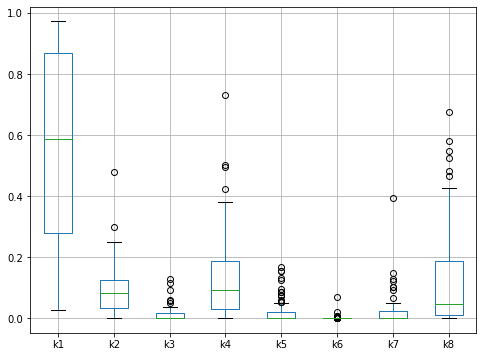

In [55]:
plt.subplots(figsize=(8,6))
painting8.drop('Painting',axis=1).boxplot()
plt.show()

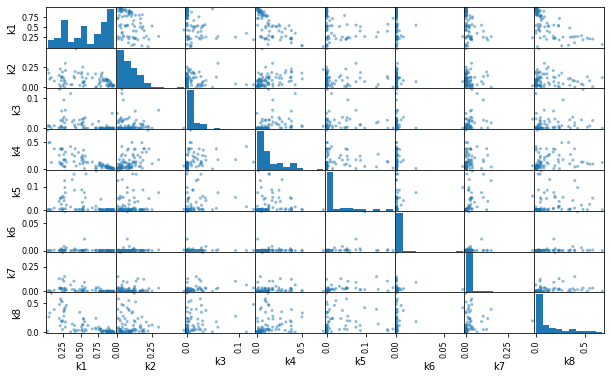

In [56]:
pd.plotting.scatter_matrix(painting8, figsize=(10, 6))
plt.show()

In [57]:
painting8.corr()

,k1,k2,k3,k4,k5,k6,k7,k8
k1,1.000000,-0.374372,-0.394693,-0.725601,-0.314189,-0.164032,-0.366416,-0.705687
k2,-0.374372,1.000000,-0.109479,0.370029,-0.046525,-0.022157,-0.097819,-0.078723
k3,-0.394693,-0.109479,1.000000,0.276638,0.123716,-0.055035,0.301722,0.244379
k4,-0.725601,0.370029,0.276638,1.000000,0.034341,-0.073315,0.056637,0.169527
k5,-0.314189,-0.046525,0.123716,0.034341,1.000000,0.272610,0.391466,0.155222
k6,-0.164032,-0.022157,-0.055035,-0.073315,0.272610,1.000000,0.034583,0.250436
k7,-0.366416,-0.097819,0.301722,0.056637,0.391466,0.034583,1.000000,0.194325
k8,-0.705687,-0.078723,0.244379,0.169527,0.155222,0.250436,0.194325,1.000000


# **3. Analyse en composantes principales**

Variables neccésaires pour l'étude normée et non-normée

In [58]:
painting8_acp = painting8.drop(['Painting',"Artist"],axis=1)
n_8 = painting8_acp.shape[0]
p_8 = painting8_acp.shape[1]
n_cp_8 = p_8

painting64_acp= painting64.drop(['Painting',"Artist"],axis=1)
n_64= painting64_acp.shape[0]  #Nombre des individus - Matrix [n,p]
p_64 = painting64_acp.shape[1]  #Nombre de variables  - Matrix [n,p]
n_cp_64 = p_64

## **3.1 ACP normée sur le jeu de do**n**nées painting8**

### Normalization

In [59]:
norm = StandardScaler()
painting8_acp_norm = norm.fit_transform(painting8_acp)

### Nous allons maintenant calculer les coordonnées

In [60]:
acp_8 = decomposition.PCA(svd_solver='full', n_components=n_cp_8)
coord_8 = acp_8.fit_transform(painting8_acp_norm)

### On obtient les valeurs propres et leur "éboulis" :

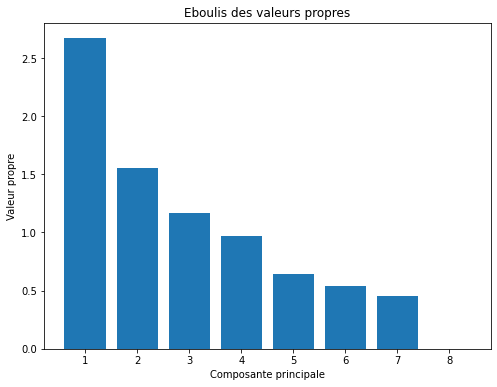

In [61]:
val_prop_8 = (n_8-1)/n_8 * acp_8.explained_variance_
part_inertie_expl_8 = acp_8.explained_variance_ratio_
plt.subplots(figsize=(8, 6))

plt.bar(np.arange(1, n_cp_8+1), val_prop_8)
#plt.grid()
plt.title('Eboulis des valeurs propres')
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.show()


### On obtient la part d'inertie expliquée cumulée

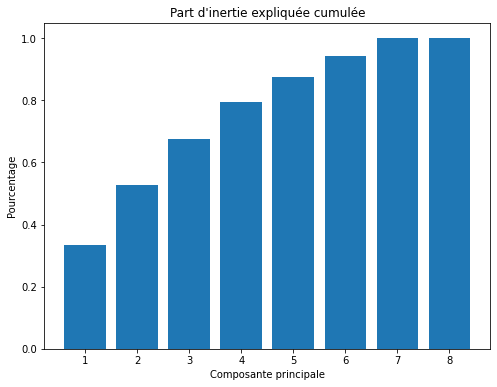

In [62]:
plt.subplots(figsize=(8, 6))

plt.bar(np.arange(1, n_cp_8+1), np.cumsum(part_inertie_expl_8))
#plt.grid()
plt.title("Part d'inertie expliquée cumulée")
plt.xlabel('Composante principale')
plt.ylabel('Pourcentage')
plt.show()


### Coordonnées

In [63]:
for i in range(0, n_cp_8):
    painting8['CP' + str(i + 1)] = coord_8[:, i]


### Cercle de corrélations

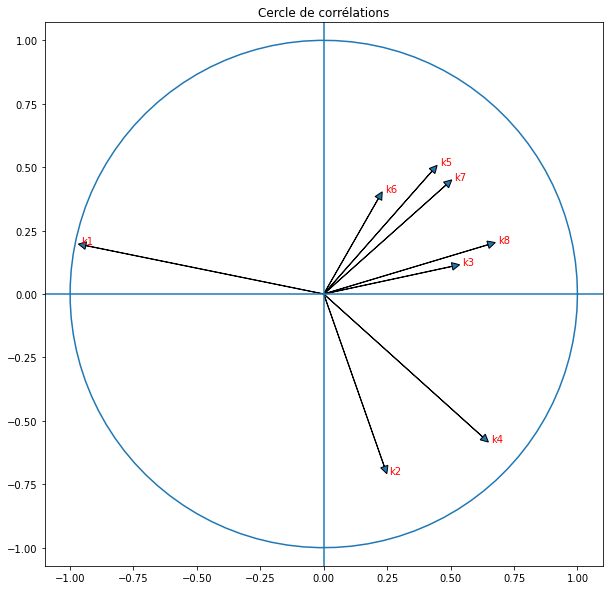

In [64]:
sqrt_val_prop_8 = np.sqrt(val_prop_8)

cor_var_8 = np.zeros((p_8,n_cp_8))
for i in range(n_cp_8):
    cor_var_8[:,i] = acp_8.components_[i,:] * sqrt_val_prop_8[i]

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, p_8):
    ax.arrow(0,
             0,
             cor_var_8[i, 0],
             cor_var_8[i, 1],
             head_width=0.03,
             head_length=0.03,
             length_includes_head=True)

    plt.text(cor_var_8[i, 0]+0.01,
             cor_var_8[i, 1],
             painting8.columns.values[i+2],
            c='red')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle de corrélations')
plt.axhline(y=0)
plt.axvline(x=0)

plt.show()

### Premier plan factoriel

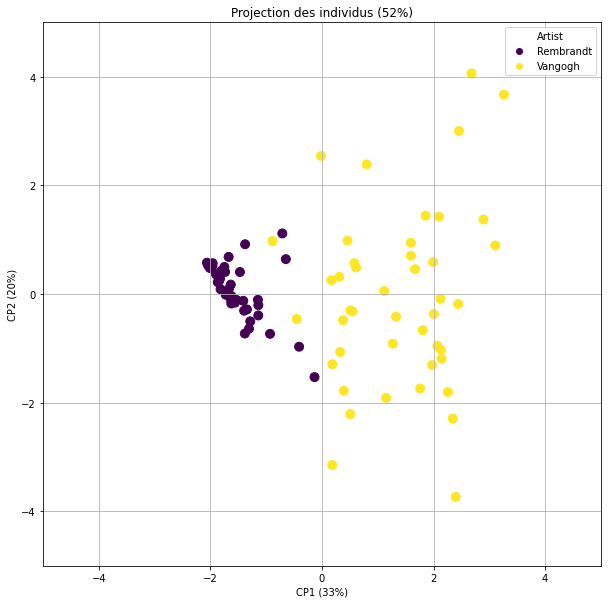

In [65]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)

scatter = plt.scatter(painting8['CP1'], painting8['CP2'], s=80, c=painting8.Artist.astype('category').cat.codes)
plt.grid()
plt.title('Projection des individus (52%)')
plt.xlabel('CP1 (33%)')
plt.ylabel('CP2 (20%)')
plt.legend(handles=scatter.legend_elements()[0],labels=["Rembrandt", "Vangogh"],title='Artist')
"""for i in range(n_8):
    plt.annotate(painting8.index[i],(coord_8[i,0]+0.1,coord_8[i,1]+0.1))"""

plt.show()

## **3.2 ACP normée sur le jeu de do**n**nées painting64**

### Normalization

In [66]:
norm = StandardScaler()
painting64_acp_norm = norm.fit_transform(painting64_acp)

### Nous allons maintenant calculer les coordonnées

In [67]:
acp_64 = decomposition.PCA(svd_solver='full', n_components=n_cp_64)
coord_64 = acp_64.fit_transform(painting64_acp_norm)
coord_64

array([[-1.30391373e+00, -3.75135702e-02,  8.72658723e-01, ...,
        -2.58284673e-16,  9.79567867e-17,  3.69802666e-16],
       [-1.05415507e+00,  1.85477976e-01,  6.96281884e-01, ...,
        -1.15728587e-16, -3.64837700e-16,  2.35162511e-16],
       [-1.24455930e+00, -1.77683561e-01,  7.88655032e-01, ...,
         1.61260968e-17, -4.88551237e-17, -1.55504964e-16],
       ...,
       [ 3.44320798e-01, -2.01078934e+00, -1.78544053e+00, ...,
         1.09848621e-16,  1.68169184e-17,  1.30967631e-16],
       [ 2.34476684e+00, -2.03428530e+00, -1.83384677e+00, ...,
         1.43705368e-16, -4.95632078e-17,  7.43816406e-17],
       [-2.03552641e-01, -1.51124836e+00, -1.07132832e+00, ...,
         1.23043031e-16, -3.45521960e-18,  1.00419067e-16]])

### On obtient les valeurs propres et leur "éboulis" :

In [68]:
val_prop_64 = (n_64-1)/n_64 * acp_64.explained_variance_
np.sum(val_prop_64) # Cette somme doit être égal au nombre de variables (64)

63.99999999999999

In [69]:
part_inertie_expl_64 = acp_64.explained_variance_ratio_

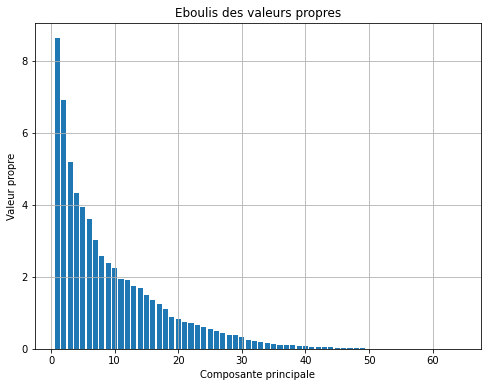

In [70]:
plt.subplots(figsize=(8, 6))
plt.bar(np.arange(1, n_cp_64+1), val_prop_64)
plt.grid()
plt.title('Eboulis des valeurs propres')
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.show()

### On obtient la part d'inertie expliquée cumulée

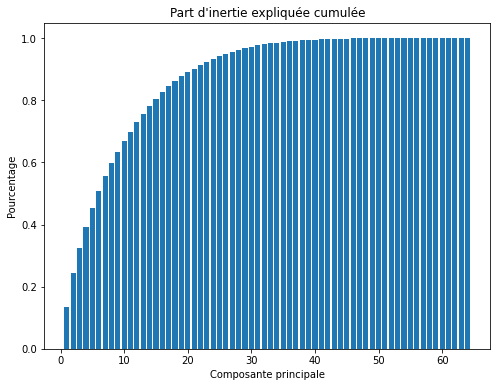

In [71]:
plt.subplots(figsize=(8, 6))
plt.bar(np.arange(1, n_cp_64+1), np.cumsum(part_inertie_expl_64))
#plt.grid()
plt.title("Part d'inertie expliquée cumulée")
plt.xlabel('Composante principale')
plt.ylabel('Pourcentage')
plt.show()

#### Valeur des inerties et pourcentage de l’inertie totale associée à chaque composant

In [72]:
Inertie= pd.DataFrame(
    {
        "Composant principale" : ["Composant" + str(x + 1) for x in range(n_cp_64)], 
        "Inertie" : val_prop_64,
        "% Inertie" : np.round(acp_64.explained_variance_ratio_ * 100),
        "% Inertie cumulee" : np.round(np.cumsum(acp_64.explained_variance_ratio_) * 100)
    }
)
Inertie

,Composant principale,Inertie,% Inertie,% Inertie cumulee
0,Composant1,8.632391e+00,13.0,13.0
1,Composant2,6.915450e+00,11.0,24.0
2,Composant3,5.183298e+00,8.0,32.0
3,Composant4,4.318079e+00,7.0,39.0
4,Composant5,3.931039e+00,6.0,45.0
5,Composant6,3.615154e+00,6.0,51.0
6,Composant7,3.022907e+00,5.0,56.0
7,Composant8,2.576931e+00,4.0,60.0
8,Composant9,2.383913e+00,4.0,63.0
9,Composant10,2.238348e+00,3.0,67.0


### Coordonnées

In [73]:
for i in range(0, n_cp_64):
    painting64['CP' + str(i + 1)] = coord_64[:, i]
painting64

,Painting,Artist,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,k21,k22,k23,k24,k25,k26,k27,k28,k29,k30,k31,k32,k33,k34,k35,k36,k37,k38,k39,k40,k41,k42,k43,k44,k45,k46,k47,k48,k49,k50,k51,k52,k53,k54,k55,k56,k57,k58,k59,k60,k61,k62,k63,k64,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,CP13,CP14,CP15,CP16,CP17,CP18,CP19,CP20,CP21,CP22,CP23,CP24,CP25,CP26,CP27,CP28,CP29,CP30,CP31,CP32,CP33,CP34,CP35,CP36,CP37,CP38,CP39,CP40,CP41,CP42,CP43,CP44,CP45,CP46,CP47,CP48,CP49,CP50,CP51,CP52,CP53,CP54,CP55,CP56,CP57,CP58,CP59,CP60,CP61,CP62,CP63,CP64
0,Rembrandt1,Rembrandt,0.075671,0.551910,1.350700e-06,0.000000e+00,0.000000,0.155140,0.051263,3.917100e-05,0.000000,0.000000e+00,1.225100e-03,1.080600e-03,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.755000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.041815,0.029327,0.000011,0.000000e+00,0.000000e+00,0.016518,0.042478,0.000000e+00,0.000000,0.000000e+00,0.005870,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.350700e-06,8.374500e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.007094,0.005139,0.000000,0.000000,0.000000e+00,0.012232,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.701500e-06,0.000000,0.000000,0.000000e+00,2.721875e-03,-1.303914,-0.037514,0.872659,-1.474208,-1.016554,0.150979,-0.174338,-0.430576,1.276974,0.031326,-0.285674,1.478780,-0.389861,0.758301,0.430862,0.176679,-0.585788,1.311828,-0.201795,-1.456181,-2.315552,0.477447,-0.462534,0.017502,-0.109771,-0.801445,0.698829,-0.396647,-1.214297,-0.179348,-0.079912,-0.193779,-0.828126,0.157209,0.000036,0.080155,-0.447764,0.214447,-0.266175,0.167189,-0.113376,0.071048,-0.322048,0.110719,-0.181230,-0.067704,-0.219551,-0.285756,0.129453,0.051153,-0.052967,-0.047115,0.005543,-0.000812,-0.001708,1.517308e-03,1.380155e-03,3.310074e-06,-1.069132e-07,-7.276452e-08,-3.516211e-17,-2.582847e-16,9.795679e-17,3.698027e-16
1,Rembrandt2,Rembrandt,0.384520,0.273480,5.512900e-03,0.000000e+00,0.000000,0.044093,0.079363,4.858400e-04,0.000000,0.000000e+00,0.000000e+00,4.641800e-06,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.974200e-05,3.094500e-06,0.000000e+00,0.000000e+00,0.006837,0.074814,0.006214,0.000000e+00,0.000000e+00,0.013274,0.041366,0.000000e+00,0.000000,0.000000e+00,0.000059,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.664700e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.010774,0.024481,0.000000,0.000000,0.000000e+00,0.018586,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.595614e-02,-1.054155,0.185478,0.696282,-1.214252,-0.905884,-0.771626,-0.540235,-1.246166,0.525122,0.046923,-0.830862,1.011172,-0.383896,0.622169,0.370744,0.314455,0.072922,0.536743,-0.366717,-0.353908,-0.832858,0.774010,-0.042158,-0.053224,-0.008701,-0.534043,0.178245,0.047174,1.272531,-0.174792,-0.071043,-0.254665,0.116456,0.033119,0.221828,-0.085624,-0.293631,0.203737,0.210381,-0.465078,-0.170230,-0.294137,-0.020628,0.096809,-0.117897,-0.170129,-0.199922,0.123955,0.035841,-0.017404,-0.021598,0.064602,-0.010129,0.010631,0.000849,2.333799e-04,-1.291011e-03,1.816581e-05,7.305854e-06,-8.589108e-07,-2.755389e-16,-1.157286e-16,-3.648377e-16,2.351625e-16
2,Rembrandt3,Rembrandt,0.554630,0.024327,4.981900e-05,0.000000e+00,0.018512,0.161480,0.104890,1.381300e-04,0.000000,0.000000e+00,7.450200e-04,5.253600e-04,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,7.380000e-03,2.490900e-04,0.000000e+00,0.000000e+00,2.665300e-03,0.034357,0.074391,0.000165,0.000000e+00,1.811600e-05,0.003107,0.012154,0.000000e+00,0.000000,0.000000e+00,0.000093,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.264500e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000036,0.000079,0.000000,0.000000,0.000000e+00,0.000002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e

### Cercle de corrélations

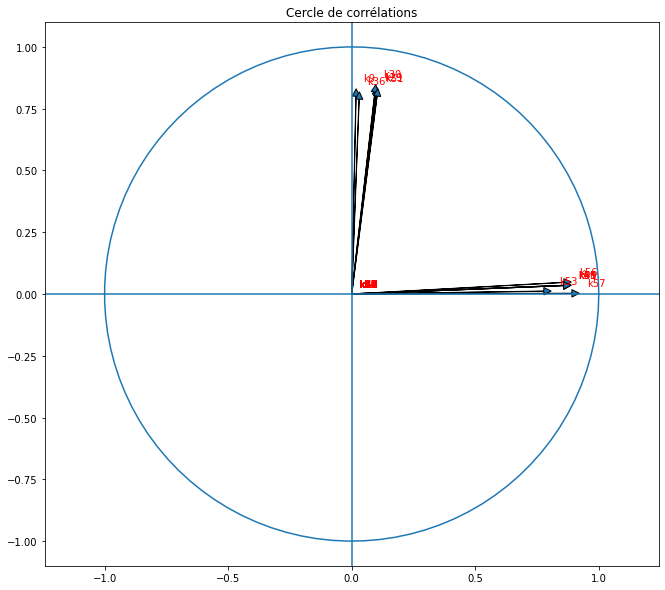

In [74]:
sqrt_val_prop_64 = np.sqrt(val_prop_64)

cor_var_64 = np.zeros((p_64,n_cp_64))
for i in range(n_cp_64):
    cor_var_64[:,i] = acp_64.components_[i,:] * sqrt_val_prop_64[i]

cor_var1 = np.zeros((p_64,n_cp_64))
cont=0
for i in cor_var_64:
  for j in range(0,1):
    if abs(i[j])> 0.8 or abs(i[j+1]) > 0.8:  #On veut montrer le correlation le plus fortes
      cor_var1[cont, j] = i[j]
      cor_var1[cont, j+1]= i[j+1]
    cont +=1

fig, ax = plt.subplots(figsize=(11, 10))

for i in range(0, len(cor_var1)):
    ax.arrow(0,
             0,
             cor_var1[i, 0],
             cor_var1[i, 1],
             head_width=0.03,
             head_length=0.03,
             length_includes_head=True)
    plt.text(cor_var1[i, 0]+0.03,
             cor_var1[i, 1]+0.03,
             painting64.drop(["Painting", "Artist"], axis=1).columns.values[i],
             c='red')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle de corrélations')

plt.axhline(y=0)
plt.axvline(x=0)

plt.show()



#### Valeur des corrélations de chaque variable initiale avec CP1 et CP2

In [75]:
corr_table= pd.DataFrame(cor_var_64[:,:2],columns = ["Composant 1", "Composant 2"])
corr_table.insert(0,"Variable",painting64_acp.columns)
corr_table

,Variable,Composant 1,Composant 2
0,k1,-0.331437,0.306740
1,k2,-0.202622,0.142117
2,k3,-0.051949,0.241013
3,k4,0.278493,-0.015848
4,k5,0.053979,-0.067912
5,k6,-0.054968,-0.247339
6,k7,-0.022957,-0.171218
7,k8,0.210496,-0.089940
8,k9,0.018190,0.830397
9,k10,0.144579,0.607603


### Premier plan factoriel

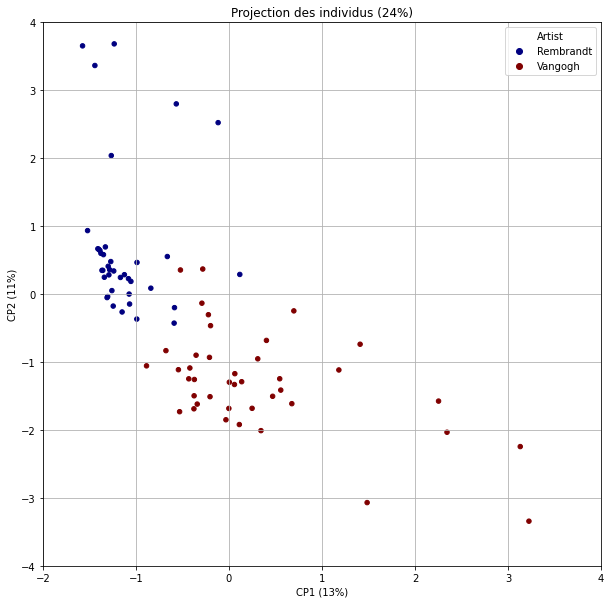

In [76]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-2,4)
axes.set_ylim(-4,4)

scatter= plt.scatter( painting64['CP1'], painting64['CP2'], s=20, c=painting64.Artist.astype('category').cat.codes, cmap='jet')
plt.grid()
plt.title('Projection des individus (24%)')
plt.xlabel('CP1 (13%)')
plt.ylabel('CP2 (11%)')
plt.legend(handles=scatter.legend_elements()[0],labels= ["Rembrandt", "Vangogh"],title='Artist')
# for i in range(n_64):
#      plt.annotate(painting64.index[i],(coord_64[i,0]+0.1,coord_64[i,1]+0.1))
plt.show()

Projection des individus : avec les libellés des individus

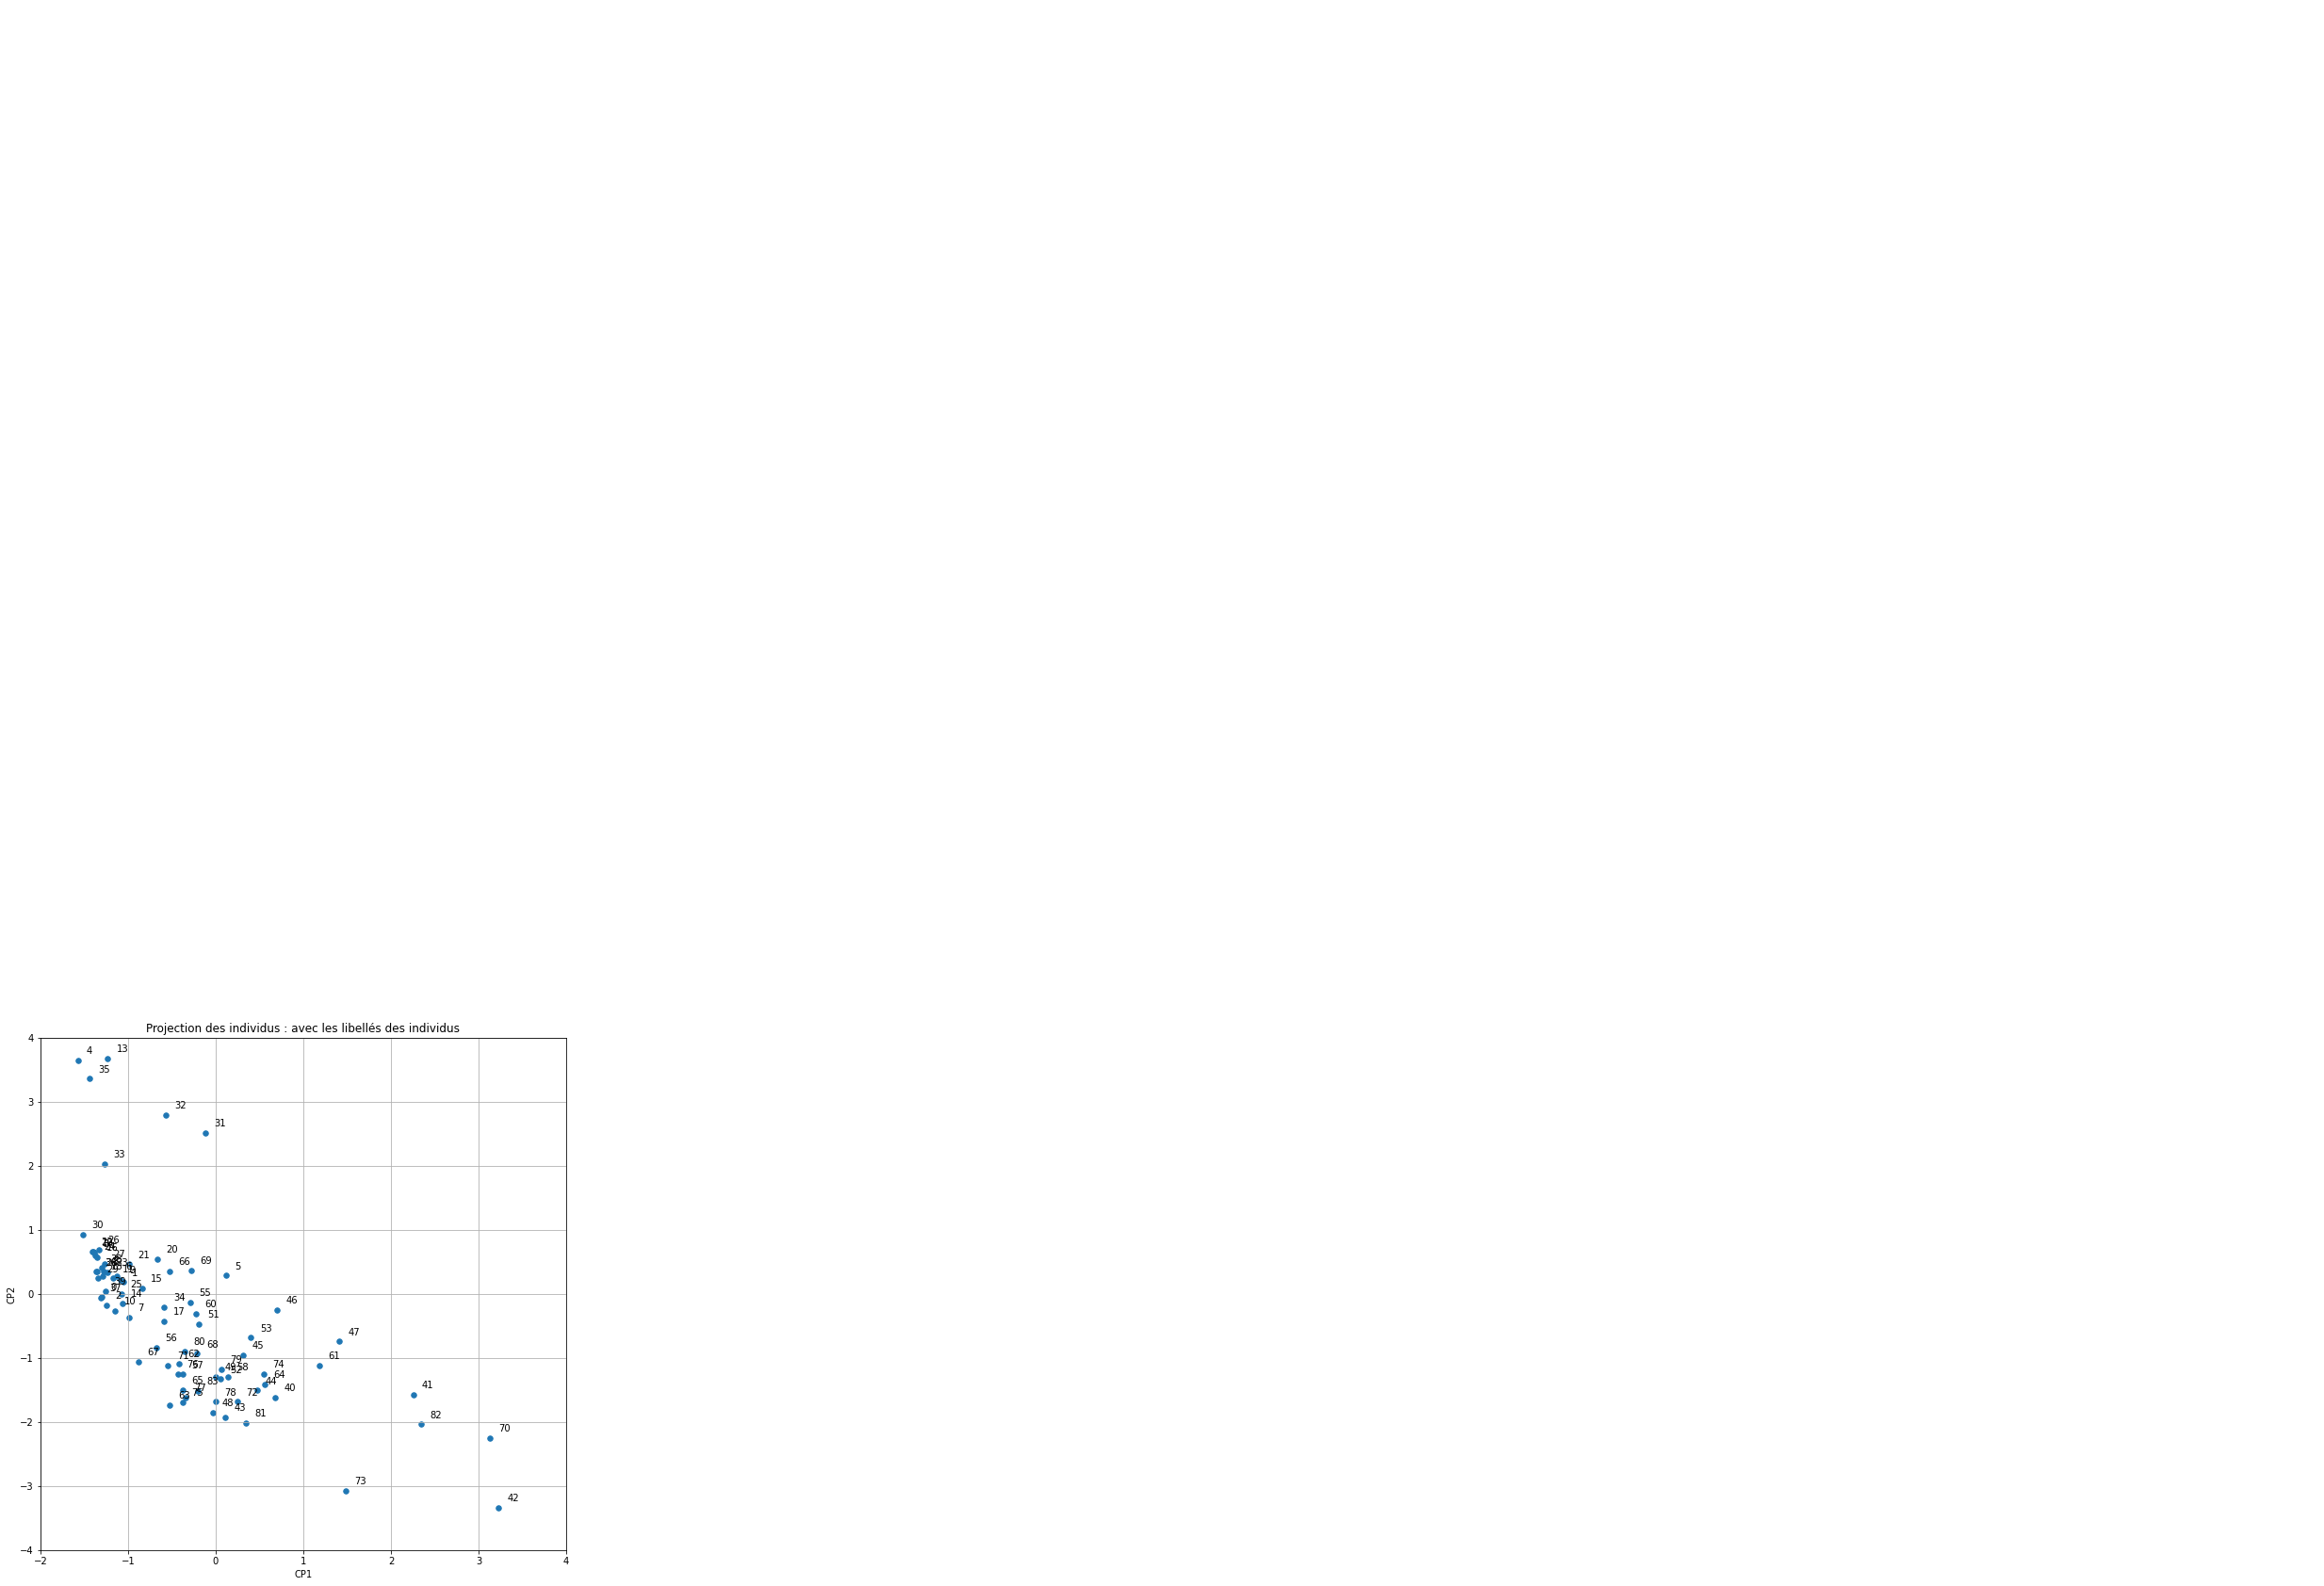

In [77]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-2,4)
axes.set_ylim(-4,4)
plt.scatter(painting64['CP1'], painting64['CP2'], s=30)
plt.grid()
plt.title('Projection des individus : avec les libellés des individus')
plt.xlabel('CP1')
plt.ylabel('CP2')
for i in range(n_64):
    plt.annotate(painting64.index[i],(coord_64[i,0]+0.1,coord_64[i,1]+0.1))
# plt.show()

## **3.3 ACP non-normée sur le jeu de données painting64**

In [78]:
painting64_non = pd.read_table("/content/drive/Shareddrives/STNUM TP/painting64.txt",sep=";",decimal=".",index_col=False, names= variables64)
painting64_non.insert(0,"Painting", Names)
painting64_non.insert(1,"Artist", types)
painting64_non["k64"] = 1-painting64_non.sum(axis=1)
painting64_acp_non= painting64_non.drop(["Painting","Artist"], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [79]:
var64= painting64_non[["k"+ str(i) for i in range(1,64)]].var(ddof=0)
np.sum(var64) #Cette somme doit être égal à la somme des valeurs propes (ACP non-normée)

0.14337424048482286

In [80]:
acp1 = decomposition.PCA(svd_solver='full', n_components=n_cp_64)
acp1.fit(painting64_acp_non)
coord_non = acp1.transform(painting64_acp_non)

On obtient les valeurs propres et leur "éboulis" :

In [81]:
val_prop_non = (n_64-1)/n_64 * acp1.explained_variance_
part_inertie_expl_non = acp1.explained_variance_ratio_

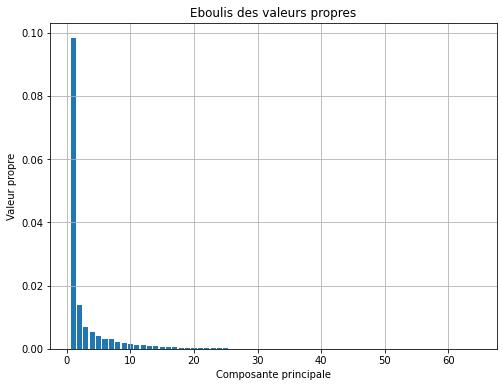

In [82]:
plt.subplots(figsize=(8, 6))
plt.bar(np.arange(1, n_cp_64+1), val_prop_non)
plt.grid()
plt.title('Eboulis des valeurs propres')
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.show()

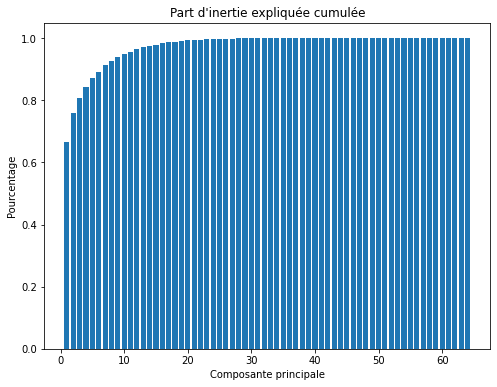

In [83]:
plt.subplots(figsize=(8, 6))
plt.bar(np.arange(1, n_cp_64+1), np.cumsum(part_inertie_expl_non))
#plt.grid()
plt.title("Part d'inertie expliquée cumulée")
plt.xlabel('Composante principale')
plt.ylabel('Pourcentage')
plt.show()

In [84]:
Inertie_non= pd.DataFrame(
    {
        "Composant principale" : ["Composant" + str(x + 1) for x in range(n_cp_64)], 
        "Inertie" : val_prop_non,
        "% Inertie" : np.round(part_inertie_expl_non * 100),
        "% Inertie cumulee" : np.round(np.cumsum(part_inertie_expl_non) * 100)
    }
)
np.sum(Inertie_non["Inertie"])
Inertie_non

,Composant principale,Inertie,% Inertie,% Inertie cumulee
0,Composant1,9.823350e-02,67.0,67.0
1,Composant2,1.370309e-02,9.0,76.0
2,Composant3,7.051934e-03,5.0,81.0
3,Composant4,5.466240e-03,4.0,84.0
4,Composant5,3.983845e-03,3.0,87.0
5,Composant6,3.244433e-03,2.0,89.0
6,Composant7,2.997974e-03,2.0,91.0
7,Composant8,2.025230e-03,1.0,93.0
8,Composant9,1.721887e-03,1.0,94.0
9,Composant10,1.491123e-03,1.0,95.0


In [85]:
for i in range(0, n_cp_64):
    painting64_non['CP' + str(i + 1)] = coord_non[:, i]
# painting64_non

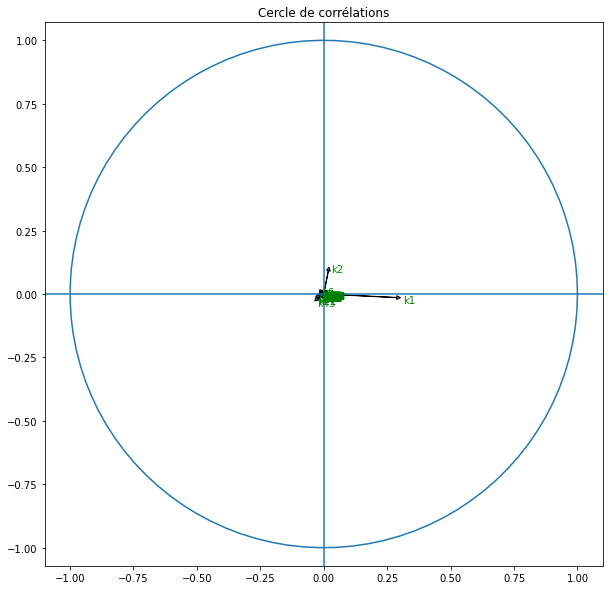

In [86]:
sqrt_val_prop_non = np.sqrt(val_prop_non)

cor_var_non = np.zeros((p_64,n_cp_64))
for i in range(n_cp_64):
    cor_var_non[:,i] = acp1.components_[i,:] * sqrt_val_prop_non[i]

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, p_64):
    ax.arrow(0,
             0,
             cor_var_non[i, 0],
             cor_var_non[i, 1],
             head_width=0.015,
             head_length=0.015,
             length_includes_head=True)

    plt.text(cor_var_non[i, 0]+0.01,
             cor_var_non[i, 1]-0.02,
             painting64_non.drop(["Painting", "Artist"], axis=1).columns.values[i],
            c='green')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle de corrélations')

plt.axhline(y=0)
plt.axvline(x=0)

plt.show()

In [87]:
corr_table_non= pd.DataFrame(cor_var_non[:,:2],columns = ["Composant 1", "Composant 2"])
corr_table_non.insert(0,"Variable",painting64_acp.columns)
corr_table_non

,Variable,Composant 1,Composant 2
0,k1,3.024843e-01,-1.480222e-02
1,k2,2.095398e-02,1.062760e-01
2,k3,2.954456e-03,2.358343e-03
3,k4,-8.742466e-05,-4.109532e-05
4,k5,-2.509934e-03,1.304007e-03
5,k6,-1.641657e-02,1.738806e-02
6,k7,-1.814346e-02,1.008101e-02
7,k8,-2.657107e-03,-5.287416e-04
8,k9,2.304494e-03,1.354411e-03
9,k10,-1.433854e-03,6.087764e-04


Premier plan factoriel

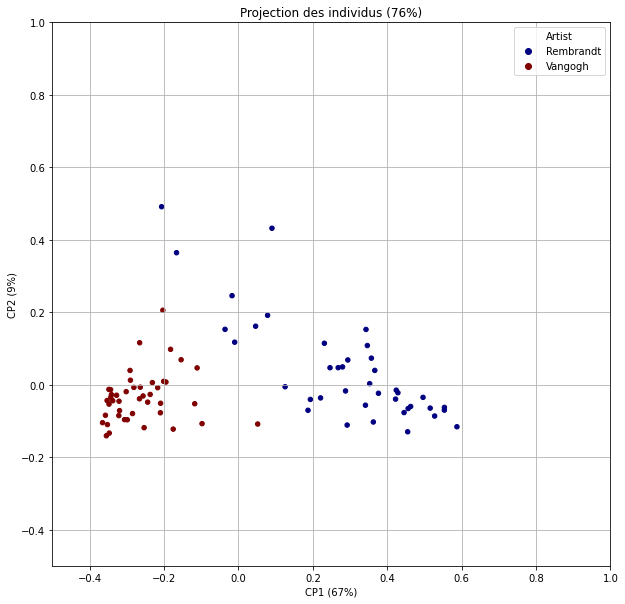

In [88]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-0.5,1)
axes.set_ylim(-0.5,1)

scatter_non= plt.scatter( painting64_non['CP1'], painting64_non['CP2'], s=20, c=painting64_non.Artist.astype('category').cat.codes, cmap='jet')
plt.grid()
plt.title('Projection des individus (76%)')
plt.xlabel('CP1 (67%)')
plt.ylabel('CP2 (9%)')
plt.legend(handles=scatter.legend_elements()[0],labels= ["Rembrandt", "Vangogh"],title='Artist')
# for i in range(n):
#     plt.annotate(painting64.index[i],(coord[i,0]+0.1,coord[i,1]+0.1))
plt.show()

# **4. Clustering sur le jeu de données painting 8**


In [89]:
painting8_cluster = painting8.drop(['Painting',"Artist"],axis=1)
n = painting8_cluster.shape[0]
p = painting8_cluster.shape[1]
norm = StandardScaler()
painting8_cluster_norm = norm.fit_transform(painting8_cluster)

## Fonction pour tracer le dendrogramme

In [90]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    print(model.children_)
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Single linkage

[[ 32  33]
 [ 24  35]
 [ 27  28]
 [ 31  36]
 [ 84  20]
 [ 26  11]
 [ 86  85]
 [ 89  88]
 [ 90  87]
 [  3  23]
 [ 91   4]
 [  8  16]
 [ 92  22]
 [ 96  95]
 [ 97  94]
 [ 13  10]
 [ 98  99]
 [100  18]
 [101   7]
 [ 38  39]
 [103  19]
 [102  37]
 [ 93  14]
 [105  29]
 [107  21]
 [104 108]
 [ 25   1]
 [109   6]
 [106 111]
 [112  30]
 [113   9]
 [110   5]
 [ 68  67]
 [114   2]
 [117  56]
 [ 55 116]
 [118 115]
 [120 119]
 [ 71  77]
 [122  66]
 [121  51]
 [ 83  72]
 [ 57  45]
 [125  54]
 [ 34  40]
 [124 128]
 [129  62]
 [126  64]
 [130  17]
 [123 127]
 [ 78  80]
 [134  79]
 [133  41]
 [132  63]
 [137 136]
 [ 61 131]
 [ 50  75]
 [138 135]
 [141 139]
 [ 48 140]
 [142  15]
 [144  65]
 [143  46]
 [145 146]
 [ 58  53]
 [147  52]
 [149  12]
 [150 148]
 [151  82]
 [152  49]
 [153  60]
 [154  74]
 [  0 155]
 [156  76]
 [157  47]
 [ 44  81]
 [158 159]
 [160  69]
 [161  43]
 [162  59]
 [163  70]
 [164  42]
 [165  73]]


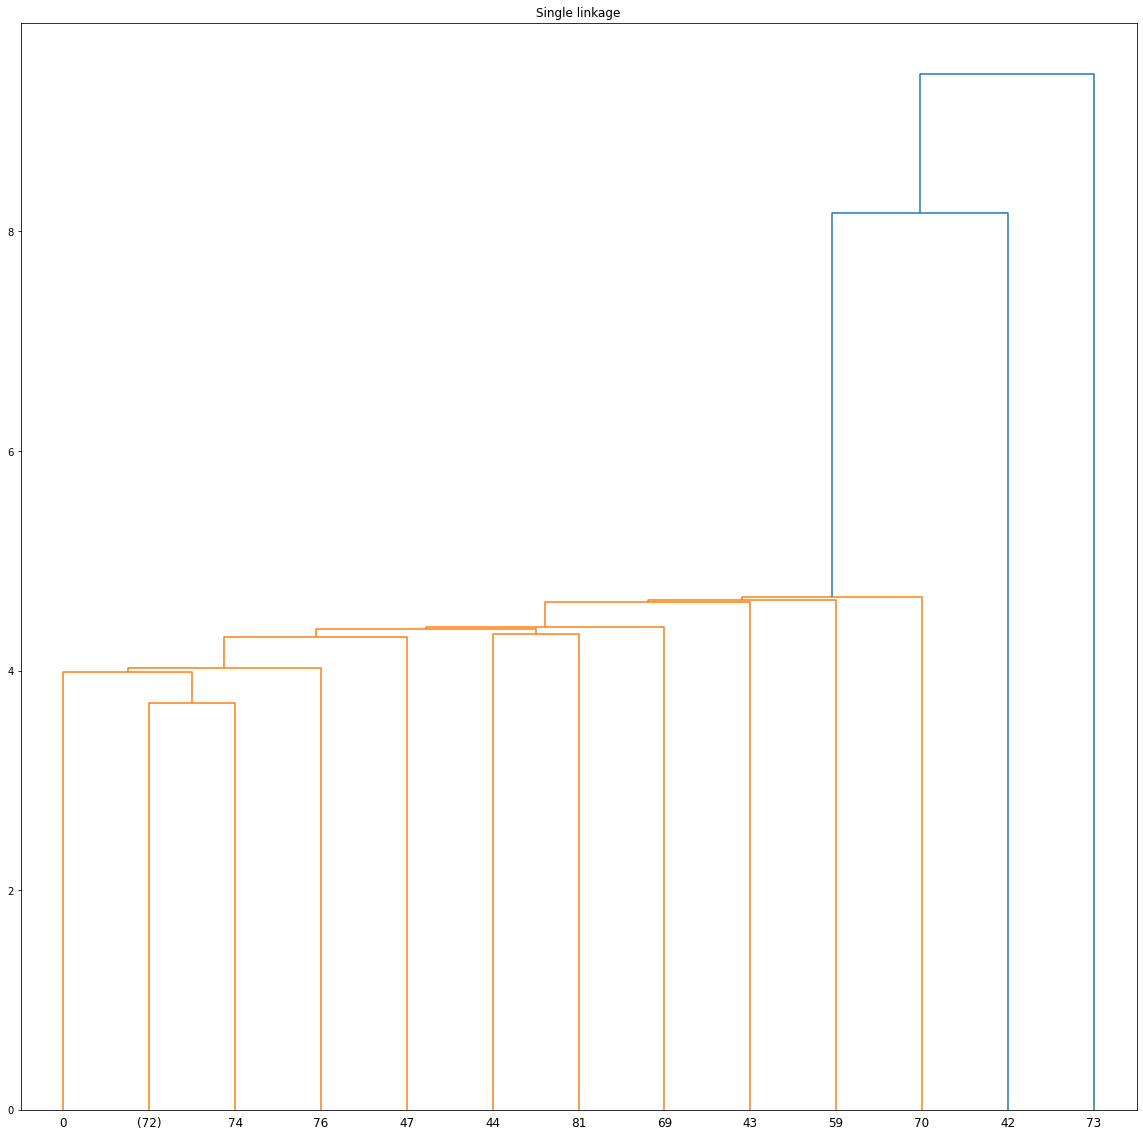

In [91]:
cah_single = AgglomerativeClustering(distance_threshold=0,
                                     affinity='euclidean',
                                     linkage='single',
                                     n_clusters=None).fit(painting8_cluster_norm)

plt.subplots(figsize=(20, 20))

plt.title("Single linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(cah_single, truncate_mode="level", p=10)
plt.show()

## Complete linkage

[[ 32  33]
 [ 24  35]
 [ 27  28]
 [ 31  36]
 [ 20  84]
 [ 11  26]
 [  3  23]
 [  8  16]
 [ 10  13]
 [ 22  85]
 [  4  89]
 [ 38  39]
 [ 86  93]
 [ 18  37]
 [  7  92]
 [  1  25]
 [ 14  90]
 [ 19  29]
 [ 95 100]
 [ 21  88]
 [ 87  94]
 [ 97 103]
 [ 67  68]
 [  6 101]
 [ 91  96]
 [ 30 104]
 [102 107]
 [  9  98]
 [  5  99]
 [ 55  56]
 [ 71  77]
 [ 72  83]
 [105 111]
 [ 45  57]
 [ 34  40]
 [108 109]
 [ 78  80]
 [  2 112]
 [ 51 113]
 [ 62 110]
 [ 50  75]
 [ 63 106]
 [ 61 117]
 [ 79 120]
 [ 17 119]
 [ 54 115]
 [ 65  66]
 [ 53  58]
 [ 48  64]
 [116 123]
 [118 128]
 [ 41 129]
 [114 130]
 [ 52 125]
 [126 132]
 [ 46 131]
 [122 136]
 [ 15 121]
 [133 134]
 [ 49 124]
 [ 76  82]
 [ 44  81]
 [ 12 142]
 [137 138]
 [ 69  74]
 [139 143]
 [140 146]
 [127 135]
 [ 47  59]
 [ 43  70]
 [ 60 147]
 [141 150]
 [149 153]
 [144 154]
 [145 148]
 [  0 155]
 [156 159]
 [151 157]
 [152 161]
 [160 162]
 [158 163]
 [ 42 164]
 [ 73 165]]


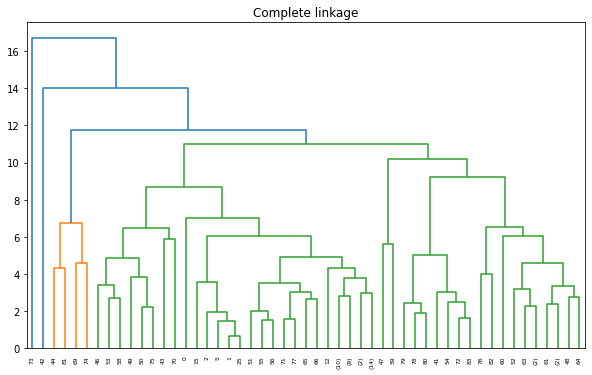

In [92]:
cah_complete = AgglomerativeClustering(distance_threshold=0,
                                       affinity='euclidean',
                                       linkage='complete',
                                       n_clusters=None).fit(painting8_cluster_norm)

plt.subplots(figsize=(10, 6))

plt.title("Complete linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(cah_complete, truncate_mode="level", p=10)
plt.show()

## Average linkage

[[ 32  33]
 [ 24  35]
 [ 27  28]
 [ 31  36]
 [ 20  84]
 [ 11  26]
 [  3  23]
 [  8  16]
 [ 85  86]
 [  4  89]
 [ 22  92]
 [ 10  13]
 [ 38  39]
 [ 18  37]
 [  7  95]
 [  1  25]
 [ 88  93]
 [ 14  90]
 [ 87  94]
 [ 96 101]
 [ 19  29]
 [ 91 102]
 [ 21 100]
 [  6 104]
 [ 98 106]
 [103 107]
 [ 67  68]
 [ 97 108]
 [  9 109]
 [ 30 105]
 [  5  99]
 [111 113]
 [ 55  56]
 [ 71  77]
 [ 72  83]
 [112 115]
 [ 45  57]
 [ 51 116]
 [ 34  40]
 [  2 114]
 [ 78  80]
 [ 54 118]
 [ 79 124]
 [ 63 110]
 [ 50  75]
 [ 62 119]
 [ 61 120]
 [ 66 117]
 [ 17 122]
 [121 127]
 [123 129]
 [ 64 130]
 [ 41 125]
 [ 53  58]
 [ 65 131]
 [132 134]
 [ 48 135]
 [ 52 133]
 [ 46 128]
 [ 15 141]
 [126 136]
 [ 12 139]
 [ 49 137]
 [138 143]
 [142 146]
 [145 147]
 [ 76  82]
 [ 74 140]
 [ 44  81]
 [144 151]
 [149 153]
 [ 69 152]
 [150 154]
 [ 70 156]
 [ 47  59]
 [ 43 148]
 [  0 157]
 [159 160]
 [ 60 161]
 [158 162]
 [155 163]
 [ 42 164]
 [ 73 165]]


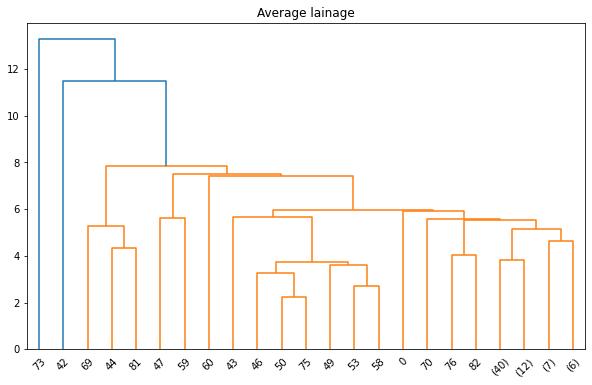

In [93]:
cah_average = AgglomerativeClustering(distance_threshold=0,
                                      affinity='euclidean',
                                      linkage='average',
                                      n_clusters=None).fit(painting8_cluster_norm)

plt.subplots(figsize=(10, 6))

plt.title("Average lainage")
# plot the top three levels of the dendrogram
plot_dendrogram(cah_average, truncate_mode="level", p=10)
plt.show()

## Ward

[[ 32  33]
 [ 24  35]
 [ 27  28]
 [ 31  36]
 [ 20  84]
 [ 11  26]
 [  3  23]
 [  8  16]
 [ 10  13]
 [  4  89]
 [ 38  39]
 [ 22  85]
 [ 18  37]
 [  7  92]
 [ 86  95]
 [  1  25]
 [ 14  90]
 [ 19  29]
 [ 21  88]
 [ 94 100]
 [ 87 101]
 [ 67  68]
 [ 30  93]
 [ 96 102]
 [ 91  98]
 [  6 103]
 [  9  97]
 [  5  99]
 [ 55  56]
 [ 71  77]
 [ 72  83]
 [ 45  57]
 [ 34  40]
 [ 78  80]
 [ 51 112]
 [104 106]
 [  2 107]
 [110 119]
 [ 50  75]
 [ 61  63]
 [ 79 117]
 [ 54 114]
 [ 17 116]
 [ 62 109]
 [ 65  66]
 [ 53  58]
 [ 64 123]
 [ 48 130]
 [113 128]
 [108 121]
 [ 41 125]
 [ 52 105]
 [ 46 129]
 [ 15 118]
 [115 131]
 [ 49 136]
 [111 120]
 [ 76  82]
 [135 137]
 [ 44  81]
 [ 12 126]
 [ 69  74]
 [133 144]
 [122 139]
 [127 146]
 [124 134]
 [ 47  59]
 [ 43  70]
 [ 60 138]
 [140 148]
 [132 142]
 [143 145]
 [  0 154]
 [141 152]
 [147 151]
 [156 157]
 [150 159]
 [149 155]
 [ 42 158]
 [160 161]
 [162 163]
 [ 73 164]
 [153 165]]


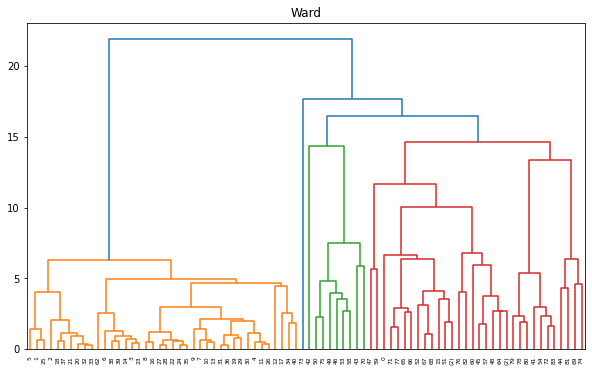

In [94]:
cah_ward = AgglomerativeClustering(distance_threshold=0,
                                   affinity='euclidean',
                                   linkage='ward',
                                   n_clusters=None).fit(painting8_cluster_norm)

plt.subplots(figsize=(10, 6))

plt.title("Ward")
# plot the top three levels of the dendrogram
plot_dendrogram(cah_ward, truncate_mode="level", p=10)
plt.show()


## Ward sin normalizar

[[  3  16]
 [ 18  33]
 [ 31  36]
 [ 19  27]
 [  4  20]
 [ 11  26]
 [ 22  84]
 [ 23  38]
 [  8  91]
 [ 28  90]
 [ 32  85]
 [ 24  35]
 [ 87  93]
 [  0  13]
 [  7   9]
 [ 30  94]
 [ 29  86]
 [ 37  88]
 [  2  25]
 [ 89  99]
 [ 95 100]
 [ 10  97]
 [  6  92]
 [ 14  39]
 [ 21 101]
 [106 107]
 [  1 102]
 [ 98 105]
 [ 67  68]
 [103 108]
 [ 40  77]
 [ 96 109]
 [  5  55]
 [104 115]
 [ 45  57]
 [ 78  80]
 [ 56 116]
 [ 66  71]
 [ 54  72]
 [ 83 114]
 [ 50  75]
 [ 79 119]
 [ 52  63]
 [ 17  62]
 [111 113]
 [ 34 127]
 [ 61 118]
 [ 51  65]
 [ 48 126]
 [ 15 120]
 [ 53  58]
 [ 64 130]
 [ 41 122]
 [ 76  82]
 [121 131]
 [110 133]
 [ 46 124]
 [112 132]
 [123 129]
 [ 74 138]
 [ 44  81]
 [ 49 134]
 [ 12 117]
 [125 136]
 [140 145]
 [ 69 144]
 [128 146]
 [ 43  70]
 [137 141]
 [ 47  59]
 [ 60 135]
 [152 154]
 [142 143]
 [148 151]
 [139 153]
 [156 158]
 [147 155]
 [ 42 149]
 [159 160]
 [157 161]
 [162 163]
 [ 73 164]
 [150 165]]


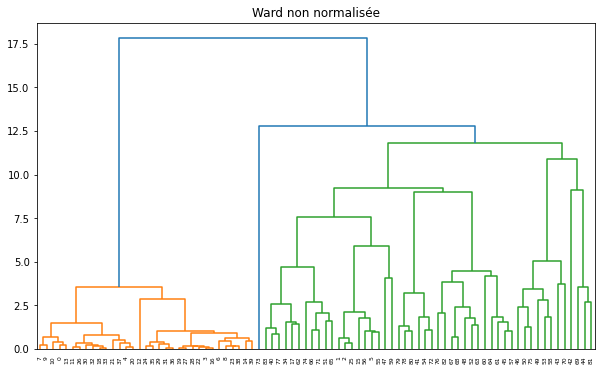

In [95]:
cah_ward_non = AgglomerativeClustering(distance_threshold=0,
                                   affinity='euclidean',
                                   linkage='ward',
                                   n_clusters=None).fit(painting8_cluster)

plt.subplots(figsize=(10, 6))

plt.title("Ward non normalisée")
# plot the top three levels of the dendrogram
plot_dendrogram(cah_ward_non, truncate_mode="level", p=10)
plt.show()

## Indices d'agrégation

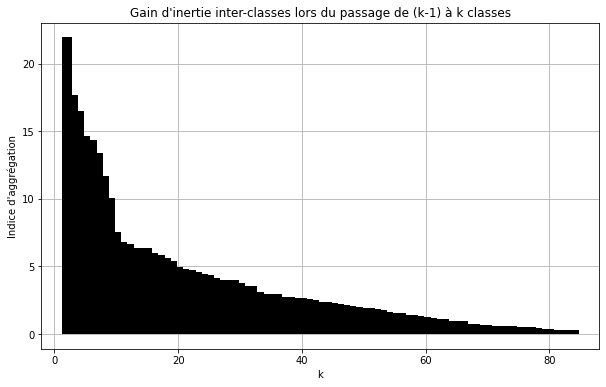

In [96]:
plt.subplots(figsize=(10, 6))

plt.vlines(np.arange(2, n+1), 0, np.flip(np.sort(cah_ward.distances_)), linewidth=10)
plt.grid()
plt.title("Gain d'inertie inter-classes lors du passage de (k-1) à k classes")
plt.xlabel("k")
plt.ylabel("Indice d'aggrégation")
plt.show()

## Indices d'agrégation non normalisée

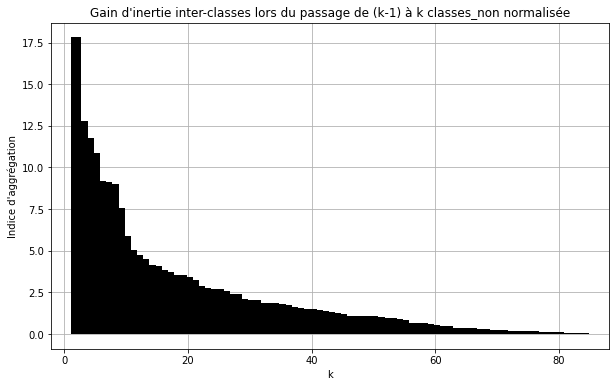

In [97]:
plt.subplots(figsize=(10, 6))

plt.vlines(np.arange(2, n+1), 0, np.flip(np.sort(cah_ward_non.distances_)), linewidth=10)
plt.grid()
plt.title("Gain d'inertie inter-classes lors du passage de (k-1) à k classes_non normalisée")
plt.xlabel("k")
plt.ylabel("Indice d'aggrégation")
plt.show()

## QUESTION 14, 2 CLUSTERS

In [98]:
cah_ward = AgglomerativeClustering(affinity='euclidean',
                                   linkage='ward',
                                   n_clusters=2).fit(painting8_cluster)
painting8['Classes_CAH'] = cah_ward.labels_

print(painting8.sort_values('Classes_CAH')['Classes_CAH'].to_string())
print(painting8.to_string())

41    0
60    0
59    0
58    0
57    0
56    0
55    0
54    0
53    0
52    0
51    0
50    0
49    0
48    0
47    0
46    0
45    0
44    0
61    0
43    0
62    0
64    0
81    0
80    0
79    0
78    0
77    0
76    0
75    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
66    0
65    0
63    0
42    0
83    0
40    0
1     0
2     0
17    0
5     0
34    0
15    0
25    0
82    0
16    1
14    1
13    1
12    1
9     1
10    1
8     1
7     1
6     1
4     1
3     1
11    1
18    1
20    1
21    1
39    1
38    1
37    1
36    1
35    1
33    1
32    1
19    1
31    1
29    1
28    1
27    1
26    1
24    1
23    1
22    1
30    1
0     1
       Painting     Artist        k1        k2            k3        k4            k5            k6            k7        k8       CP1       CP2       CP3       CP4       CP5       CP6       CP7           CP8  Classes_CAH
0    Rembrandt1  Rembrandt  0.824910  0.080641  0.000000e+00  0.067172  1.350700e-06  8.374500e-05  0.000000